In [22]:
# 07_drive_efficiency.ipynb
# 🚗 Drive Efficiency Analysis

# 🛠 Requirements:
# - pandas, matplotlib, seaborn (install via `pip install pandas matplotlib seaborn`)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

DATA_DIR = "./data"

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,8]

In [23]:
# 📂 Load 2023 drive and game data

drives_path = os.path.join(DATA_DIR, "drives", "drives_2023.csv")
games_path = os.path.join(DATA_DIR, "games.csv")

drives = pd.read_csv(drives_path)
games = pd.read_csv(games_path)

# Only load FBS vs FBS games
games = games.query("home_classification == 'fbs' and away_classification == 'fbs'")

print(f"{len(drives)} drives loaded")

/tmp/ipykernel_66503/413918882.py:7: DtypeWarning: Columns (5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv(games_path)


35524 drives loaded


In [24]:
# 🧠 Derive drive points from game score deltas

# Merge game-level final scores
score_cols = [
    "id", "home_team", "away_team", "home_points", "away_points"
]
games_subset = games[games["season"] == 2023][score_cols]
drives = drives.merge(games_subset, how="inner", left_on="gameId", right_on="id")

# Calculate drive points (end - start) for offense
drives["offensePoints"] = drives["endOffenseScore"] - drives["startOffenseScore"]

# Preview drive-level stats
drives[["offense", "defense", "driveNumber", "driveResult", "plays", "yards", "offensePoints"]].head()

,offense,defense,driveNumber,driveResult,plays,yards,offensePoints
0,Jacksonville State,UTEP,1,PUNT,5,8,0
1,UTEP,Jacksonville State,2,DOWNS,9,42,0
2,Jacksonville State,UTEP,3,FG,10,24,3
3,UTEP,Jacksonville State,4,PUNT,5,17,0
4,Jacksonville State,UTEP,5,TD,12,80,7


In [25]:
# 📊 Average points per drive (PPD) by offense

ppd = drives.groupby("offense")["offensePoints"].mean().reset_index().rename(columns={"offensePoints": "points_per_drive"})
ppd = ppd.sort_values("points_per_drive", ascending=False)

ppd.head(10)

,offense,points_per_drive
83,Oregon,3.769784
33,Georgia,3.570423
49,LSU,3.436090
50,Liberty,3.065089
117,USC,3.056250
79,Oklahoma,3.030864
126,Washington,2.908571
60,Michigan,2.896970
45,Kansas,2.770992
46,Kansas State,2.770270


/tmp/ipykernel_66503/4138801134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ppd.head(10), x="points_per_drive", y="offense", palette="crest")


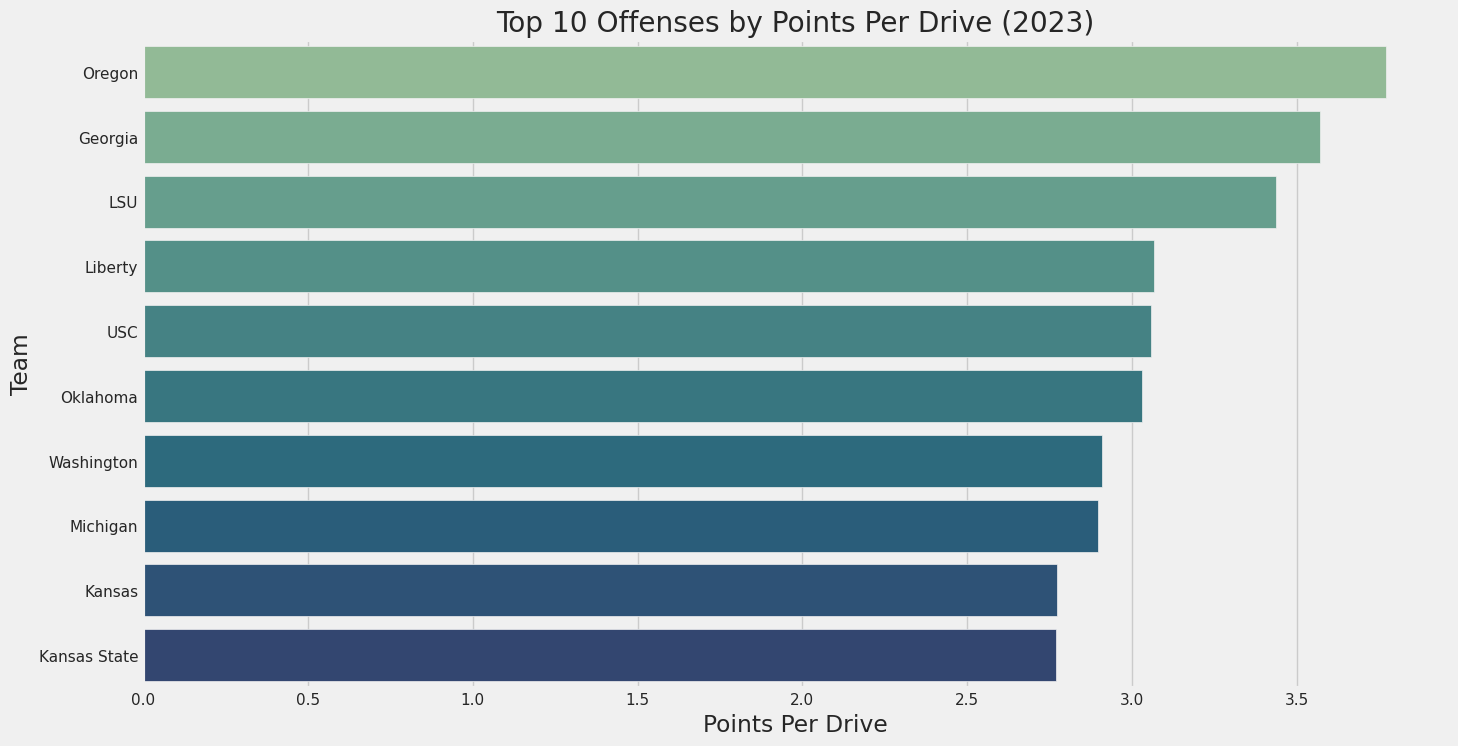

In [26]:
# 📈 Visualize top 10 offenses by PPD

sns.barplot(data=ppd.head(10), x="points_per_drive", y="offense", palette="crest")
plt.title("Top 10 Offenses by Points Per Drive (2023)")
plt.xlabel("Points Per Drive")
plt.ylabel("Team")
plt.show()

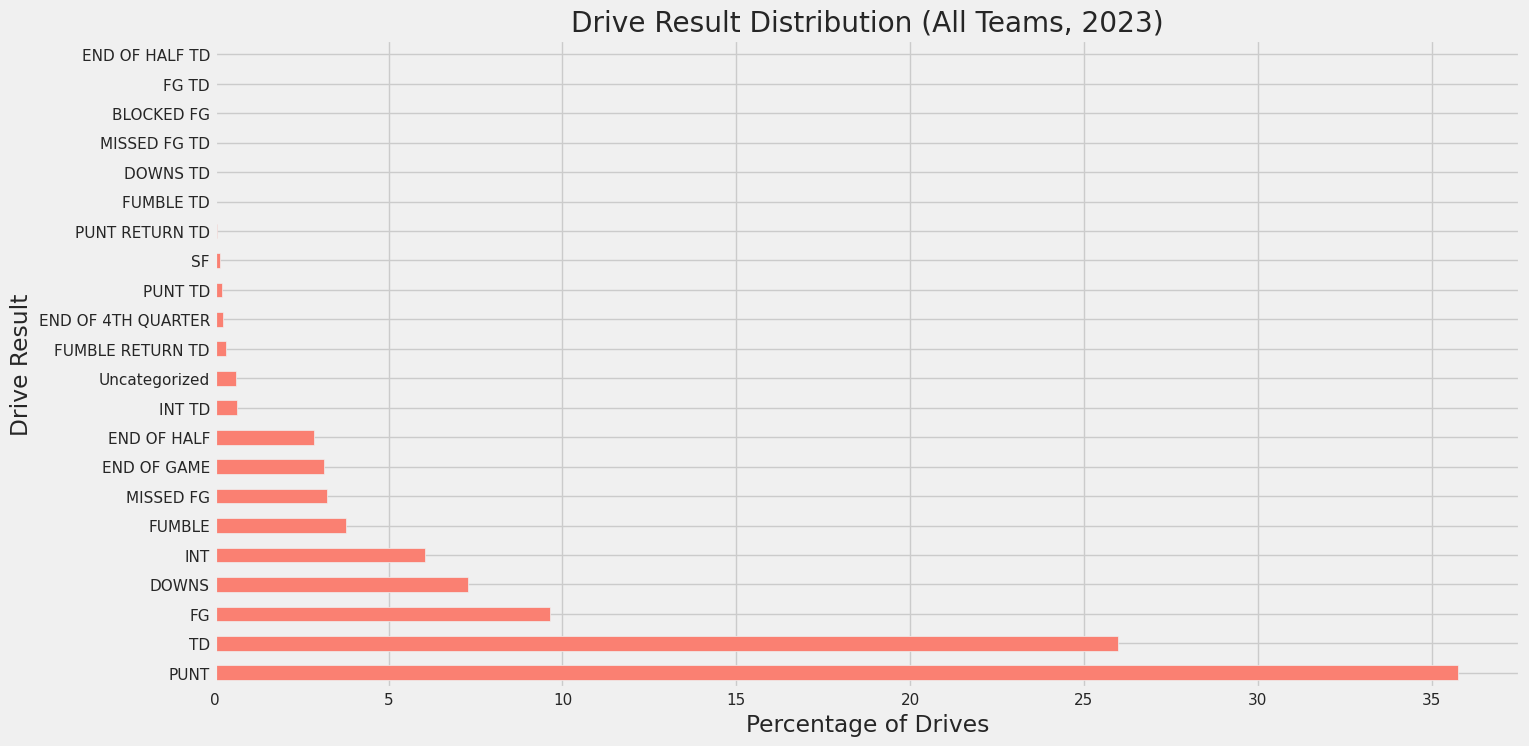

In [27]:
# 🔍 Drive outcome rate breakdown

outcomes = drives["driveResult"].value_counts(normalize=True).mul(100).round(2)
outcomes.plot(kind="barh", color="salmon")
plt.title("Drive Result Distribution (All Teams, 2023)")
plt.xlabel("Percentage of Drives")
plt.ylabel("Drive Result")
plt.show()

/tmp/ipykernel_66503/635578850.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  field_ppd = drives.groupby("startYardline_bin")["offensePoints"].mean().reset_index()


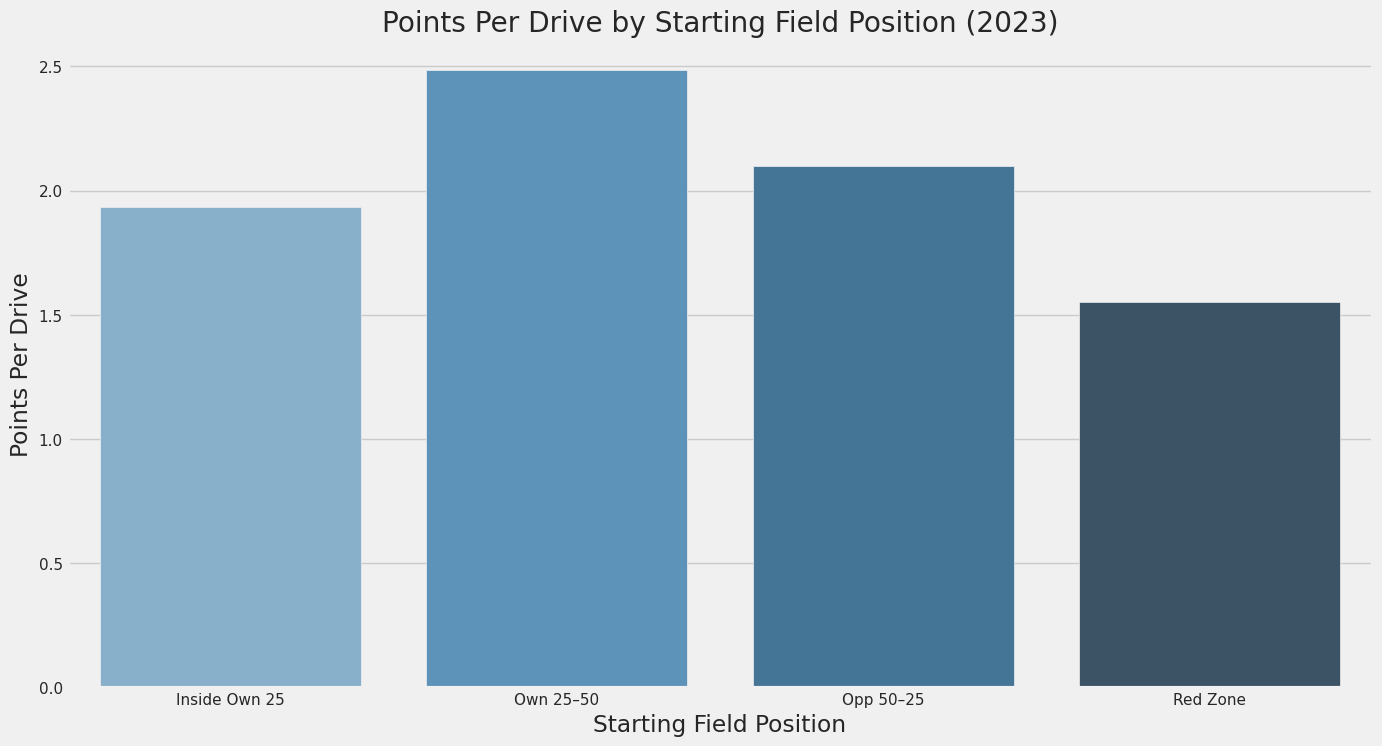

In [28]:
# 🧪 Field position efficiency: Starting yardline buckets

drives["startYardline_bin"] = pd.cut(drives["startYardline"], bins=[0, 25, 50, 75, 100], labels=["Inside Own 25", "Own 25–50", "Opp 50–25", "Red Zone"])
field_ppd = drives.groupby("startYardline_bin")["offensePoints"].mean().reset_index()

sns.barplot(data=field_ppd, x="startYardline_bin", y="offensePoints", palette="Blues_d", hue=field_ppd["startYardline_bin"])
plt.title("Points Per Drive by Starting Field Position (2023)")
plt.xlabel("Starting Field Position")
plt.ylabel("Points Per Drive")
plt.show()

In [29]:
# ✅ Summary

# In this notebook, you:
# - Calculated points per drive using score deltas
# - Identified top offenses by drive efficiency
# - Visualized distribution of drive results
# - Explored impact of field position on scoring

# 🧪 Try This:
# - Filter by quarter, game state, or opponent
# - Compare drive stats by offense vs. defense team
# - Calculate scoring rates (drives ending in TD/FG)